In [1]:
from model import network_mnist,naive_train,test_taskwise,test,benchmark,train_stream,test_stream,compute_fisher_information,apply_importance_mask
from torch.utils.data import DataLoader, Subset
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from plot import plot_parameter_importance
import os


/opt/miniconda3/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

model=network_mnist(256,128)
model_2=network_mnist(256,128)
#print(model)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model_2.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs=5





Training on Task 0
Post-training accuracy on Task 0: 99.91%
✓ Figure saved: figures/task_0_importance.pdf


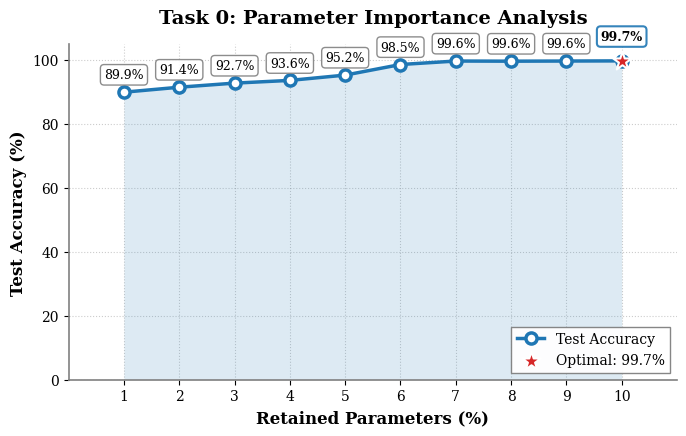


Training on Task 1
Post-training accuracy on Task 1: 99.41%
✓ Figure saved: figures/task_1_importance.pdf


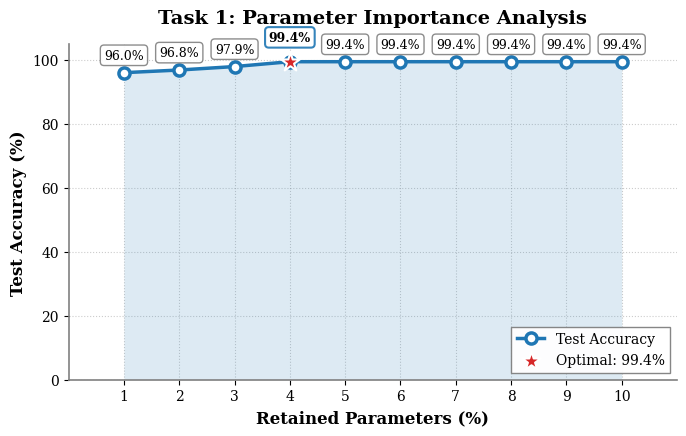


Training on Task 2
Post-training accuracy on Task 2: 99.79%
✓ Figure saved: figures/task_2_importance.pdf


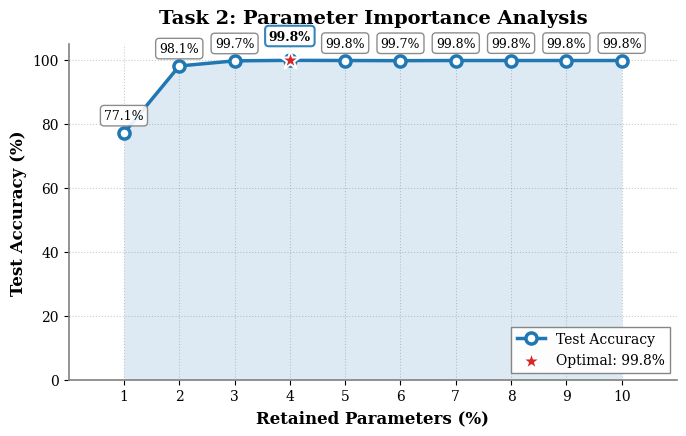


Training on Task 3
Post-training accuracy on Task 3: 99.70%
✓ Figure saved: figures/task_3_importance.pdf


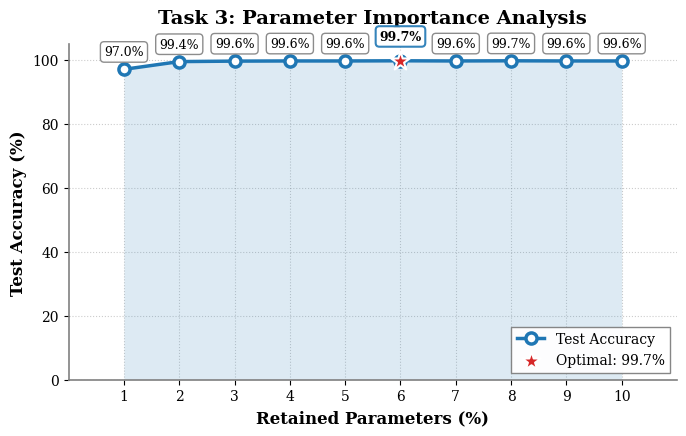


Training on Task 4
Post-training accuracy on Task 4: 98.89%
✓ Figure saved: figures/task_4_importance.pdf


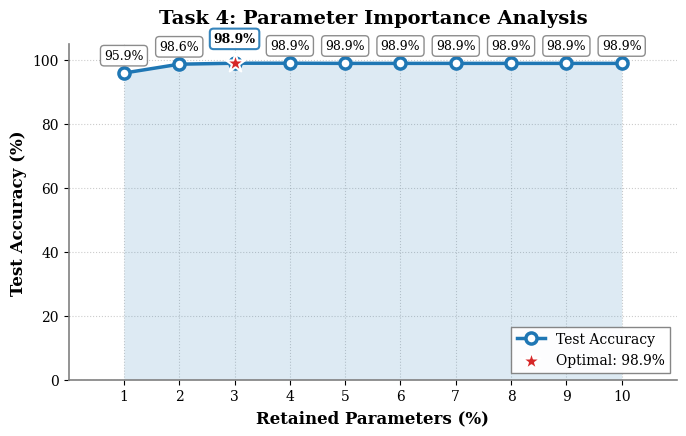

In [3]:
os.makedirs('figures', exist_ok=True)
all_tasks_data = {}

for task in range(5):
    print(f"\n{'='*70}")
    print(f"Training on Task {task}")
    print(f"{'='*70}")

    naive_train(model, task, epochs, criterion=criterion, optimizer=optimizer, device=device)
    acc = test_taskwise(model, task, device)
    print(f"Post-training accuracy on Task {task}: {acc:.2f}%")

    fisher_dict = compute_fisher_information(model, task_number=task, num_samples=500, 
                                             criterion=criterion, device=device)
    percent_list = list(range(1, 11))
    accuracy_vs_percent = []

    original_weights = {name: param.clone() for name, param in model.state_dict().items()}
    for p in percent_list:
        model, mask_dict = apply_importance_mask(model, fisher_dict, importance_percent=p)
        acc_p = test_taskwise(model, task, device)
        accuracy_vs_percent.append(acc_p)
        model.load_state_dict(original_weights, strict=False)
       
    all_tasks_data[task] = (percent_list, accuracy_vs_percent)
    plot_parameter_importance(
        percent_list=percent_list,
        accuracy_list=accuracy_vs_percent,
        task_id=task,
        save_path=f'figures/task_{task}_importance.pdf',
        show_plot=True  # Set to False to not display during training
    )
